In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covid_data = pd.read_csv('Covid_Data.csv')


In [5]:
print(covid_data.info())
#information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          12 non-null     object
 1   Region        12 non-null     object
 2   New_Cases     12 non-null     int64 
 3   Deaths        12 non-null     int64 
 4   Recoveries    12 non-null     int64 
 5   Active_Cases  12 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 708.0+ bytes
None


In [6]:
#It is the overview of the Dataset
print(covid_data.head())

         Date Region  New_Cases  Deaths  Recoveries  Active_Cases
0  2023-01-01  North       1200      15         950           235
1  2023-01-01  South        800      10         600           190
2  2023-01-01   East       1500      20        1100           380
3  2023-01-01   West        900      12         700           188
4  2023-02-01  North       1000      12         850           138


In [7]:
#It checks that the dataset has null values
print(covid_data.isnull().sum())

Date            0
Region          0
New_Cases       0
Deaths          0
Recoveries      0
Active_Cases    0
dtype: int64


In [8]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

In [9]:
print(covid_data.describe())

                      Date    New_Cases     Deaths   Recoveries  Active_Cases
count                   12    12.000000  12.000000    12.000000     12.000000
mean   2023-01-31 00:00:00   958.333333  11.750000   791.666667    154.916667
min    2023-01-01 00:00:00   600.000000   6.000000   550.000000     42.000000
25%    2023-01-01 00:00:00   787.500000   8.000000   650.000000     78.500000
50%    2023-02-01 00:00:00   875.000000  11.000000   750.000000    136.500000
75%    2023-03-01 00:00:00  1125.000000  15.000000   950.000000    201.250000
max    2023-03-01 00:00:00  1500.000000  20.000000  1100.000000    380.000000
std                    NaN   268.694938   4.454314   175.594229    105.306875


In [10]:
regional_stats = covid_data.groupby('Region').agg({
    'New_Cases':'sum',
    'Deaths':'sum',
    'Recoveries':'sum',
    'Active_Cases':'mean'
}).reset_index()
regional_stats['Death_Rate'] = (regional_stats['Deaths'] / regional_stats['New_Cases']) * 100
regional_stats['Recovery_Rate'] = (regional_stats['Recoveries'] / regional_stats['New_Cases']) * 100

print(regional_stats)

  Region  New_Cases  Deaths  Recoveries  Active_Cases  Death_Rate  \
0   East       3900      53        3050    265.666667    1.358974   
1  North       3000      35        2550    138.333333    1.166667   
2  South       2150      24        1800    108.666667    1.116279   
3   West       2450      29        2100    107.000000    1.183673   

   Recovery_Rate  
0      78.205128  
1      85.000000  
2      83.720930  
3      85.714286  


In [14]:
monthly_trends = covid_data.groupby('Date').agg({
    'New_Cases' : 'sum',
    'Deaths' : 'sum',
    'Recoveries' : 'sum',
}).reset_index()

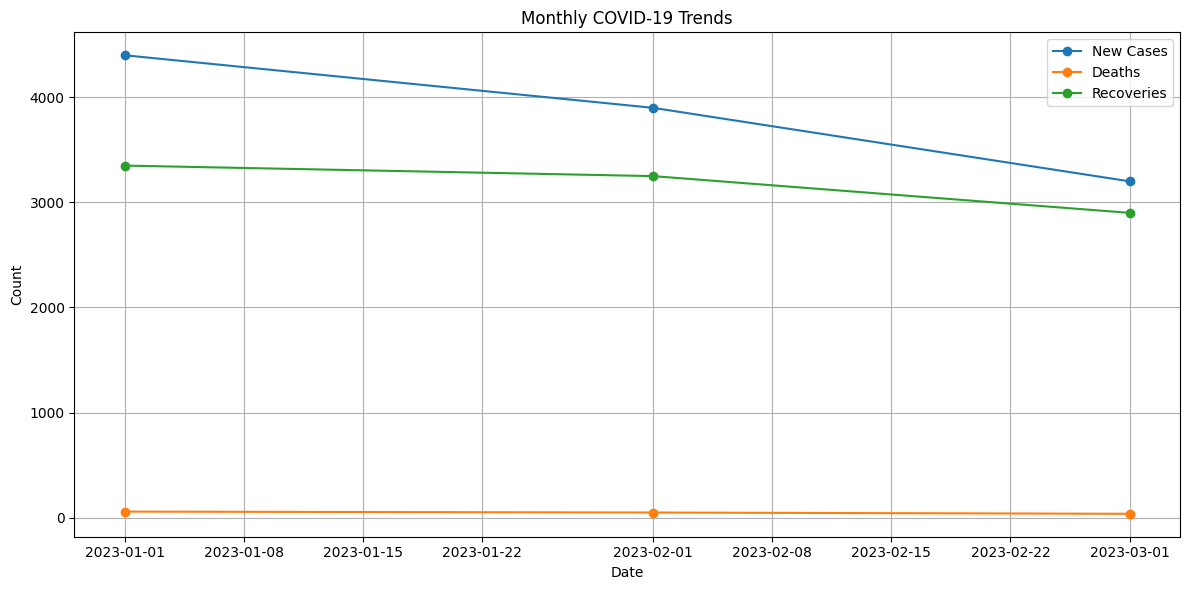

In [16]:
plt.figure(figsize=(12,6))
plt.plot(monthly_trends['Date'], monthly_trends['New_Cases'], marker = 'o', label = 'New Cases')
plt.plot(monthly_trends['Date'], monthly_trends['Deaths'], marker = 'o', label = 'Deaths')
plt.plot(monthly_trends['Date'], monthly_trends['Recoveries'], marker = 'o', label = 'Recoveries')
plt.title('Monthly COVID-19 Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_trends.png')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

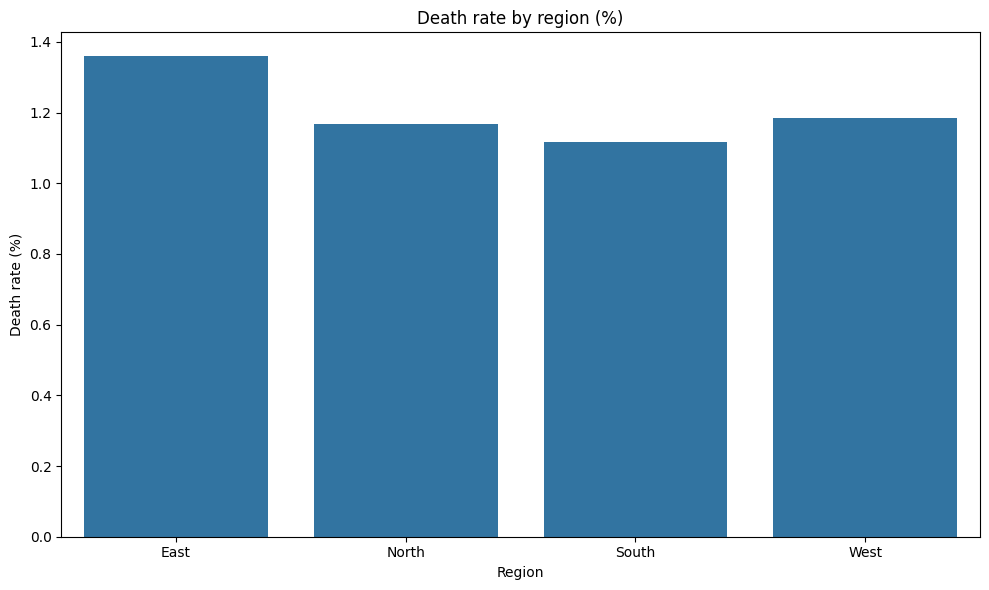

In [17]:
#regional Comparison
plt.figure(figsize = (10,6))
sns.barplot(x = 'Region', y = 'Death_Rate', data=regional_stats)
plt.title('Death rate by region (%)')
plt.ylabel('Death rate (%)')
plt.tight_layout()
plt.savefig('death_rate_by_region.png')
plt.show

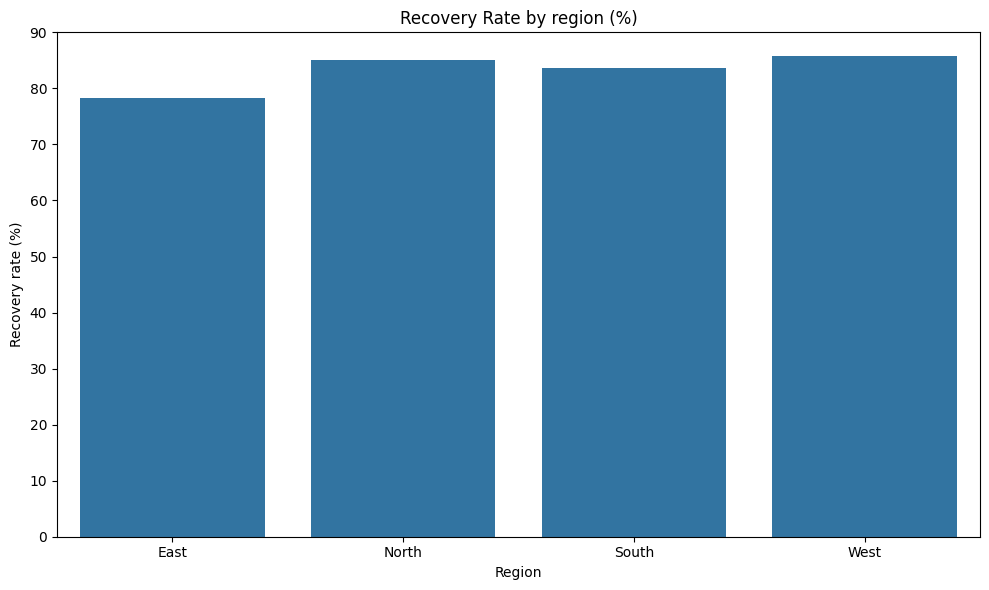

In [24]:
#recovery rate comparison
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Region', y = 'Recovery_Rate', data = regional_stats)
plt.title('Recovery Rate by region (%)')
plt.ylabel('Recovery rate (%)')
plt.tight_layout()
plt.savefig('recovery_rate_by_region.png')
plt.show()


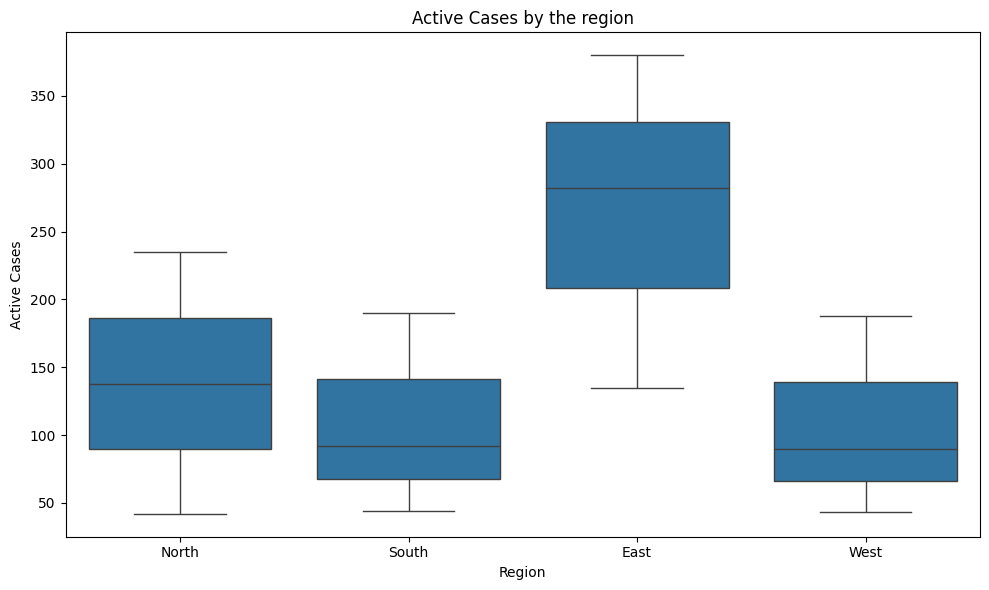

In [26]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Region', y = 'Active_Cases', data = covid_data)
plt.title('Active Cases by the region')
plt.ylabel('Active Cases')
plt.tight_layout()
plt.savefig('active_cases_by_region.png')
plt.show()

In [27]:
total_cases = covid_data['New_Cases'].sum()
total_deaths = covid_data['Deaths'].sum()
total_recoveries = covid_data['Recoveries'].sum()
overall_death_rate = (total_deaths / total_cases) * 100
overall_recovery_rate = (total_recoveries / total_cases) * 100

print("\n=== Key Findings ===")
print(f"Total Cases: {total_cases}")
print(f"Total Deaths: {total_deaths}")
print(f"Total Recoveries: {total_recoveries}")
print(f"Overall Death Rate: {overall_death_rate:.2f}%")
print(f"Overall Recovery Rate: {overall_recovery_rate:.2f}%")


=== Key Findings ===
Total Cases: 11500
Total Deaths: 141
Total Recoveries: 9500
Overall Death Rate: 1.23%
Overall Recovery Rate: 82.61%


In [28]:
with open('covid_analysis_summary.txt', 'w') as f:
    f.write("COVID-19 Data Analysis Summary\n")
    f.write("=============================\n\n")
    f.write(f"Total Cases: {total_cases}\n")
    f.write(f"Total Deaths: {total_deaths}\n")
    f.write(f"Total Recoveries: {total_recoveries}\n")
    f.write(f"Overall Death Rate: {overall_death_rate:.2f}%\n")
    f.write(f"Overall Recovery Rate: {overall_recovery_rate:.2f}%\n\n")
    f.write("Regional Statistics:\n")
    f.write(regional_stats.to_string())